In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.linear_model as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from random import randint
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sn

# IndianLiverPatientData

In [2]:
data = pd.read_csv("D:/DataSets/indian_liver_patient.csv")
data = pd.get_dummies(data)
data.dropna(inplace=True)
data['Dataset'] = data['Dataset'].map({2:0 , 1:1})
features = data.loc[:,data.columns!='Dataset']
label = data['Dataset']
normalized_features = preprocessing.normalize(features)
print(features.shape,label.shape,normalized_features.shape)

(579, 11) (579,) (579, 11)


# Plotting cluster

In [3]:
def plot_cluster(a,b):
    pca = PCA(n_components=2)
    pca_2d = pca.fit_transform(a)
    pca_data = np.vstack((pca_2d.T, b)).T
    pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
    sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
    plt.show()

D:\Users\Shinigami\Anaconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


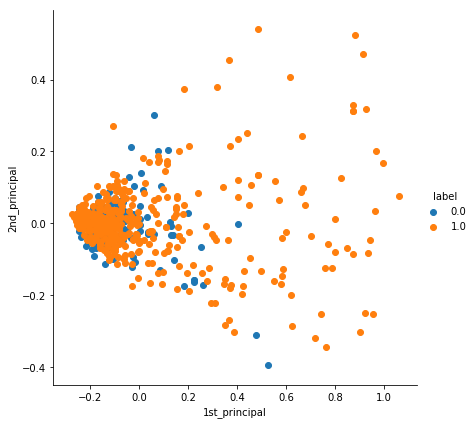

In [4]:
plot_cluster(normalized_features,label)

# KMeans

In [5]:
model = KMeans(n_clusters=2)
model.fit(features)
print(features.shape)
predict = model.predict(features)
predict_df = pd.DataFrame(predict)
# print(list(predict).count(0),list(predict).count(1))

(579, 11)


# HabermanData

In [6]:
data1 = pd.read_csv("D:/DataSets/haberman.data",header=None)
data1.columns = ['Age','Year','Nodes','Survival_status']
data1.dropna(inplace=True)
data1.reset_index(drop=True,inplace=True)
data1['Survival_status'] = data1['Survival_status'].map({2:0 , 1:1})
features1 = data1.loc[:,data1.columns!='Survival_status']
label1 = data1['Survival_status']
normalized_features1 = preprocessing.normalize(features1)
normalized_features1.shape

(306, 3)

D:\Users\Shinigami\Anaconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


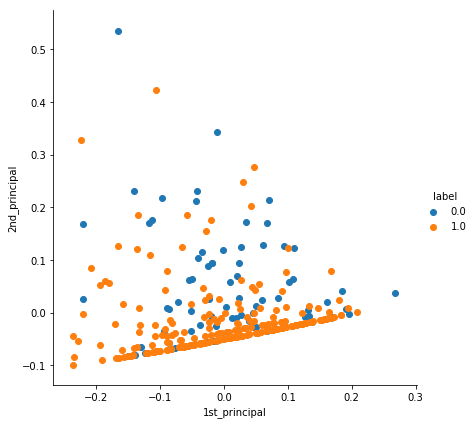

In [7]:
plot_cluster(normalized_features1,label1)

In [8]:
model1 = KMeans(n_clusters=2)
model.fit(normalized_features1)
predict1 = model.predict(normalized_features1)
print(list(predict1).count(0),list(predict1).count(1))

158 148
